In [71]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
import iso3166 as iso
from datetime import datetime, timedelta

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [72]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [73]:
%pip install --upgrade plotly

### Import Statements

In [74]:
pip install seaborn

In [75]:
pip install iso3166

Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install country_converter --upgrade

Note: you may need to restart the kernel to use updated packages.


In [77]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


### Notebook Presentation

In [78]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [79]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [80]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [81]:
print("The shape of the data is:",df_data.shape) # Gives shape of data

The shape of the data is: (4324, 9)


In [82]:
count_row = df_data.shape[0]  # Gives number of rows
count_col = df_data.shape[1]  # Gives number of columns
print("There are",count_row, "rows and",count_col, "columns in this data.")

There are 4324 rows and 9 columns in this data.


In [83]:
print("The column names are as follows:",df_data.columns)

The column names are as follows: Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [84]:
df_data.isna()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4319,False,False,False,False,False,False,False,True,False
4320,False,False,False,False,False,False,False,True,False
4321,False,False,False,False,False,False,False,True,False
4322,False,False,False,False,False,False,False,True,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [85]:
clean_df = df_data.dropna()

In [86]:
df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [87]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [88]:
df_data[df_data["Price"].notna()]["Price"].str.replace(',', '').astype(float).describe()

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: Price, dtype: float64

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

<AxesSubplot:>

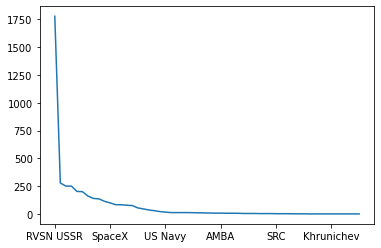

In [89]:
df_data["Organisation"].value_counts().plot()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [90]:
df_data["Rocket_Status"].value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

<AxesSubplot:>

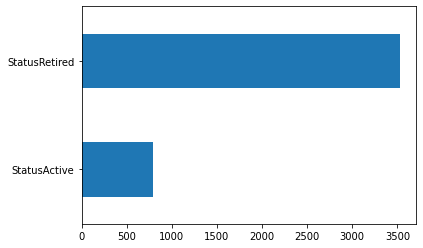

In [91]:
df_data["Rocket_Status"].value_counts().sort_values().plot(kind="barh")

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [92]:
df_data["Mission_Status"].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [93]:
df_data.groupby("Mission_Status").agg({"Mission_Status":pd.Series.count})

,Mission_Status
Mission_Status,
Failure,339
Partial Failure,102
Prelaunch Failure,4
Success,3879


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [94]:
px.histogram(df_data.sort_values(by=["Organisation", "Price"], ascending=[False, False]), x="Price",nbins=10) 

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [95]:
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]

df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(df_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
df_data.loc[(df_data["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
df_data.loc[(df_data["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"
df_data.loc[(df_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"

countries = {country.name: key for key, country in iso.countries_by_alpha3.items()}
df_data = df_data.replace({"Country": countries})

launches = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

world_map = px.choropleth(launches, locations="Country", color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,RUS
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [96]:
for c in countries: 
    print(c)

Afghanistan
Åland Islands
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antarctica
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia, Plurinational State of
Bonaire, Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Bouvet Island
Brazil
British Indian Ocean Territory
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cabo Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Christmas Island
Cocos (Keeling) Islands
Colombia
Comoros
Congo
Congo, Democratic Republic of the
Cook Islands
Costa Rica
Côte d'Ivoire
Croatia
Cuba
Curaçao
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Falkland Islands (Malvinas)
Faroe Islands
Fiji
Finland
France
French Guiana
French Polynesia
French Southern Territories
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenl

# Use a Choropleth Map to Show the Number of Failures by Country


In [97]:
statuses = df_data.groupby("Country")["Mission_Status"].value_counts().rename_axis(["Country", "Status"]).reset_index(name='counts')
failures = statuses[statuses["Status"].str.contains("Fail")].groupby("Country").sum()

world_map = px.choropleth(failures, locations=failures.index, color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True) 
world_map.show()


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [98]:
sunburst = df_data.groupby(by=["Country", "Organisation", "Mission_Status"], as_index=False).size()
sunburst = sunburst.sort_values("size", ascending=False)
sunburst.head()
px.sunburst(sunburst, path=["Country", "Organisation", "Mission_Status"], values="size", title="Missions By Country")

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [99]:
money_spent = df_data[df_data["Price"].notna()]

money_spent["Price"] = money_spent["Price"].str.replace(',', '').astype(float)

total_money_spent = money_spent.groupby("Organisation")["Price"].sum().reset_index()
total_money_spent.sort_values(by="Price", ascending=False)
total_money_spent.head()


<ipython-input-99-d639fc0680c5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Price
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,340.26"
3,EER,20.00
4,ESA,37.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [100]:
organisation_expense = money_spent.groupby("Organisation")["Price"].mean().reset_index()
organisation_expense.sort_values("Price", ascending=False)
organisation_expense.head()

,Organisation,Price
0,Arianespace,170.26
1,Boeing,177.29
2,CASC,40.13
3,EER,20.00
4,ESA,37.00


# Chart the Number of Launches per Year

In [101]:
# Converted the date to the datetime object, then extracted the year from the datetime object.
df_data['date'] = pd.to_datetime(df_data['Date'])
df_data['year'] = df_data['date'].apply(lambda datetime: datetime.year)
# df_data['year'].head()

# Counted the number of times the same year is mentioned.
ds = df_data['year'].value_counts().reset_index()
ds.columns = [
    'year', 
    'count'
]
# Passing the year and the count to the bar graph.
fig = px.bar(
    ds, 
    x='year', 
    y="count", 
    orientation='v', 
    title='Missions number by year' 
#     width=800
)
fig.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [102]:
# Converted the date to the datetime object, then extracted the month from the datetime object.
df_data['date'] = pd.to_datetime(df_data['Date'])
df_data['month'] = df_data['date'].apply(lambda datetime: datetime.month)
# df_data['month'].head()

# Counted the number of times the same month is mentioned.
ds = df_data['month'].value_counts().reset_index()
ds.columns = [
    'month', 
    'count'
]
# Passing the year and the count to the bar graph.
fig = px.bar(
    ds, 
    x='month', 
    y="count", 
    orientation='v', 
    title='Missions number by month' 
#     width=800
)
fig.show()

# December has the most launches of all time.

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [103]:
# Using max to find the most launches per month
most_launches = ds['count'].max()
print("Most launches in a month =", most_launches)

# print the month associated with the max value
ds.sort_values(by="count", ascending=False)
ds.max()

Most launches in a month = 450


month     12
count    450
dtype: int64

In [104]:
#Using min to find the least launches per month
least_launches = ds['count'].min()
print("Least launches in a month =", least_launches)
ds.min()

Least launches in a month = 268


month      1
count    268
dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [105]:
# Line chart of Launch Price over time
df_data = df_data[df_data['Price'].notna()]
# df_data['Price'] = pd.to_numeric(df_data['Price'].astype(str).replace(',',''))
# float(df_data['Price'].astype(str).replace(',',''))

# Price is an object currently...can't convert to numeric
df_data['Price'].apply(lambda x: int(float(x.replace(',',''))))

# df_data.groupby('year')['Price'].plot()

# Calculate the average price per year
#Group by year and get mean
# ds = df_data['Price'].mean().reset_index()


# avg_price = df_data.groupby('year')['Price'].agg(np.mean)

# df_data = px.data.gapminder().query("Price")
# fig = px.line(avg_price, x="year", y="Price", title='Average Price of Launches Over Time')
# fig.show()

df_data["Price"].describe()

count       964
unique       56
top       450.0
freq        136
Name: Price, dtype: object

In [106]:
# Histogram example
# px.histogram(df_data.sort_values(by=["year", "Price"], ascending=[False, False]), x="Price",nbins=10)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [147]:
# Grab data from Organisations and Locations columns
# Sort through data to find the top 10 Organisations 
top_10=pd.DataFrame(columns=df_data.columns)
for val in df_data.groupby("Organisation").count().sort_values("Date",ascending=False)[:10].index:
  print(val)
  org=df_data[df_data.Organisation==val]
  top_10=top_10.append(org,ignore_index=False, verify_integrity=False, sort=None)
top_10

df_data[df_data.Organisation=="CASC"]

top_10.groupby("Organisation").count().sort_values("Date",ascending=False)[:10].index

# print(top_10.shape)

# Create a chart to display the data
px.histogram(top_10.sort_values(by=["Organisation", "Date"], ascending=[True, False]), x="Organisation",nbins=10) 

CASC
NASA
SpaceX
ULA
Arianespace
Northrop
ISRO
MHI
VKS RF
US Air Force


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [108]:
# Sort years
df_data.sort_values("year")

# Grab years from start of dataset til 1991

# Example code that might work for pulling years and countries
# df = px.data.gapminder().query("year == 2007").query("continent == 'Americas'")
# fig = px.pie(df, values='pop', names='country',
#              title='Population of American continent',
#              hover_data=['lifeExp'], labels={'lifeExp':'life expectancy'})
# fig.update_traces(textposition='inside', textinfo='percent+label')
# fig.show()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,year,month
4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Tue Sep 01, 1964 15:00 UTC",Titan IIIA | Transtage 1,StatusRetired,63.23,Failure,USA,1964-09-01 15:00:00+00:00,1964,9
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Dec 10, 1964 16:52 UTC",Titan IIIA | Transtage 2,StatusRetired,63.23,Success,USA,1964-12-10 16:52:00+00:00,1964,12
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu May 06, 1965 15:00 UTC",Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,USA,1965-05-06 15:00:00+00:00,1965,5
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA","Thu Feb 11, 1965 15:19 UTC",Titan IIIA | LES 1,StatusRetired,63.23,Success,USA,1965-02-11 15:19:00+00:00,1965,2
3839,US Air Force,"SLC-4W, Vandenberg AFB, California, USA","Wed Sep 28, 1966 19:12 UTC",Titan IIIB | OPS 4096,StatusRetired,59.0,Success,USA,1966-09-28 19:12:00+00:00,1966,9
...,...,...,...,...,...,...,...,...,...,...,...
37,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Apr 09, 2020 08:05 UTC",Soyuz 2.1a | Soyuz MS-16,StatusActive,48.5,Success,RUS,2020-04-09 08:05:00+00:00,2020,4
36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,CHN,2020-04-09 11:46:00+00:00,2020,4
34,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Wed Apr 22, 2020 19:30 UTC",Falcon 9 Block 5 | Starlink V1 L6,StatusActive,50.0,Success,USA,2020-04-22 19:30:00+00:00,2020,4
30,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Sun May 17, 2020 13:14 UTC",Atlas V 501 | OTV-6 (USSF-7),StatusActive,120.0,Success,USA,2020-05-17 13:14:00+00:00,2020,5


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [109]:
# .value_counts()
launches = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()


,Country,counts
0,USA,490
1,CHN,159
2,RUS,100
3,FRA,95
4,IND,67


In [149]:
# Grab the data for USA and for Russian Federation (aka USSR)
Or_df = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]
# count the data for each country to get the total number of launches per country
Or_df = Or_df.groupby('Country').count()
Or_df 

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,date,year,month
Country,,,,,,,,,,
RUS,100,100,100,100,100,100,100,100,100,100
USA,490,490,490,490,490,490,490,490,490,490


In [135]:
# Pie Chart comparing total number of launches in the USA and in the USSR
fig = px.pie(Or_df, names="Location", values="Mission_Status", title='Comparison of Total Number of Launches in the USA and in the USSR')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

In [119]:
# For this cell used the failures by Country question as template
# status of missions by year 
statuses = df_data.groupby("year")["Mission_Status"].value_counts().rename_axis(["year", "Status"]).reset_index(name='counts')
# number of failures by year
failures_by_year = statuses[statuses["Status"].str.contains("Fail")].groupby("year").sum()
failures_by_year

,counts
year,
1964,1
1967,2
1968,1
1986,1
1990,1
1991,1
1993,2
1994,3
1995,2


In [120]:
# Plotly example code for a basic sunburst chart:
# df = px.data.tips()
# fig = px.sunburst(df, path=['day', 'time', 'sex'], values='total_bill')
# fig.show()

# How to grab the failures by year from above to use as data points for the chart? Rather than mission status I want failures 
failures_by_year = px.data.tips()
fig = px.sunburst(df_data, path=["year", "Mission_Status"])
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 